===== 5 Data Teratas =====


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted



===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None

===== Statistika Deskriptif =====


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
count,120999.000000,120999,120999.000000,120999
unique,NaN,2,NaN,4
top,NaN,perempuan,NaN,normal
freq,NaN,61002,NaN,67755
mean,30.173803,NaN,88.655434,NaN
std,17.575119,NaN,17.300997,NaN
min,0.000000,NaN,40.010437,NaN
25%,15.000000,NaN,77.000000,NaN
50%,30.000000,NaN,89.800000,NaN
75%,45.000000,NaN,101.200000,NaN


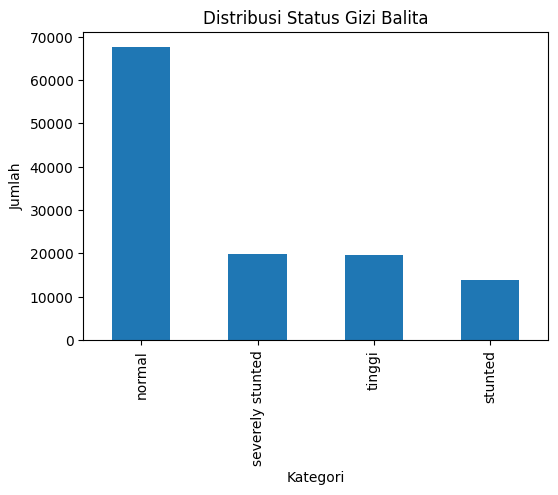

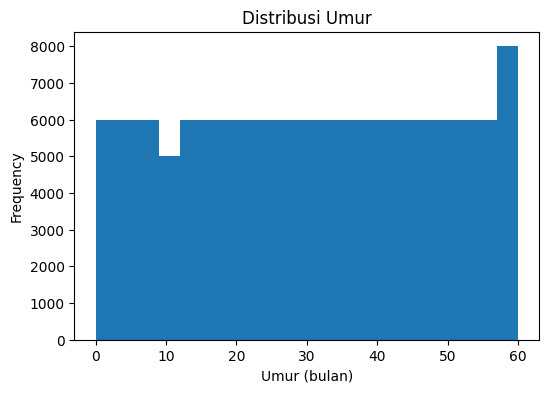

Data setelah encoding:


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1



===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16753
           1       1.00      1.00      1.00      5145
           2       1.00      1.00      1.00      3521
           3       1.00      1.00      1.00      4831

    accuracy                           1.00     30250
   macro avg       1.00      1.00      1.00     30250
weighted avg       1.00      1.00      1.00     30250


===== Confusion Matrix =====
[[16743     0     9     1]
 [    0  5143     2     0]
 [    4     4  3513     0]
 [   13     0     0  4818]]


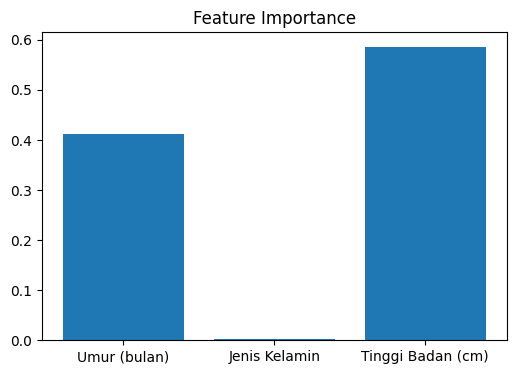

In [12]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset
df = pd.read_csv('data_balita.csv')

print("===== 5 Data Teratas =====")
display(df.head())

print("\n===== Informasi Dataset =====")
print(df.info())

print("\n===== Statistika Deskriptif =====")
display(df.describe(include='all'))

# 3. Exploratory Data Analysis
# Distribusi Status Gizi
plt.figure(figsize=(6,4))
df['Status Gizi'].value_counts().plot(kind='bar')
plt.title("Distribusi Status Gizi Balita")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

# Distribusi Umur
plt.figure(figsize=(6,4))
df['Umur (bulan)'].plot(kind='hist', bins=20)
plt.title("Distribusi Umur")
plt.xlabel("Umur (bulan)")
plt.show()

# 4. Preprocessing Data
# Encode kategori
label_cols = ['Jenis Kelamin', 'Status Gizi']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

# Cek hasil encode
print("Data setelah encoding:")
display(df.head())

# 5. Split Data
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 6. Model Training
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 7. Evaluation
y_pred = model.predict(X_test)

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))

print("\n===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importance = model.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(X.columns, importance)
plt.title("Feature Importance")
plt.show()
